# МОДЕЛИРОВАНИЕ №2 - ПРИБЫЛЬ

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,3 hours 13 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,1 month and 27 days
H2O_cluster_name:,H2O_from_python_unknownUser_v9231n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.131 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV2.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('ProductID')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
6111,12,31676.4,Natura,12,UrbanConvenienceNotCompete
92879,7,11020.6,Pirum,12,RuralProductivityNotCompete
32901,3,35010.4,VanArsdel,12,UrbanModerationIsCompete
84770,3,16441.1,Currus,12,RuralSelectNotCompete
95380,3,35541.4,Abbas,12,UrbanModerationIsCompete
14559,2,2518.74,Natura,12,YouthYouthNotCompete
16301,2,2518.74,Natura,12,YouthYouthNotCompete
48439,2,9070.74,Quibus,12,RuralSelectNotCompete
21787,2,28348.7,VanArsdel,12,UrbanModerationIsCompete
7503,2,9058.14,Currus,12,MixAll SeasonNotCompete


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
6111,12,31676.4,Natura,12,UrbanConvenienceNotCompete
92879,7,11020.6,Pirum,12,RuralProductivityNotCompete
32901,3,35010.4,VanArsdel,12,UrbanModerationIsCompete
95380,3,35541.4,Abbas,12,UrbanModerationIsCompete
16301,2,2518.74,Natura,12,YouthYouthNotCompete
48439,2,9070.74,Quibus,12,RuralSelectNotCompete
33126,2,26458.7,Natura,12,UrbanModerationIsCompete
60073,2,10382.4,Natura,12,UrbanConvenienceNotCompete
70578,1,6708.87,VanArsdel,12,UrbanConvenienceNotCompete
6450,1,15113.7,Natura,12,UrbanModerationIsCompete


In [5]:
valid

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
14559,2,2518.74,Natura,12,YouthYouthNotCompete
15955,1,9002.7,Aliqui,12,UrbanExtremeNotCompete
73942,1,6923.7,Aliqui,12,UrbanExtremeNotCompete
41616,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
19468,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
25312,1,7307.37,Currus,12,UrbanExtremeNotCompete
89117,1,7370.37,Currus,12,UrbanExtremeNotCompete
77469,1,16316.4,VanArsdel,12,UrbanModerationIsCompete
34482,1,7685.37,Currus,12,UrbanExtremeNotCompete
81623,1,4718.7,Aliqui,12,RuralSelectNotCompete


In [6]:
unseen

Zip,Units,Revenue_T,Manufacturer,MonthNo,CategoryInSegmentInCompete
84770,3,16441.1,Currus,12,RuralSelectNotCompete
21787,2,28348.7,VanArsdel,12,UrbanModerationIsCompete
7503,2,9058.14,Currus,12,MixAll SeasonNotCompete
32164,1,14615.4,Natura,12,UrbanModerationIsCompete
75287,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
47023,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
48656,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
70506,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
30534,1,12851.4,VanArsdel,12,UrbanModerationIsCompete
93648,1,7370.37,Currus,12,UrbanExtremeNotCompete


In [7]:
y = "Revenue_T"
x=train.columns
x.remove(y)

# Тренировка модели

In [8]:
aml = H2OAutoML(max_models = 10, seed = 1)
aml.train(x = x, y = y,  training_frame = train, validation_frame = valid)

AutoML progress: |
11:48:17.106: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_4_20230921_114817


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    69                 69                          108728                 8            8            8             23            250           120.71

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 4045271.6489733174
RMSE: 2011.2860684083
MAE: 1424.7279945752487
RMSLE: 0.3795216885819471
Mean Residual Deviance: 4045271.6489733174

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 4521139.0910295565
RMSE: 2126.297037346748
MAE: 1432.1181397765451
RMSLE: 0.3813741476125113
Mean Residual Deviance: 4521139.0910295565

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 4291063.019664631
RMSE: 2071.48811719127
MAE: 1434.7126411074794
RMSLE: 0.3809797237935355
Mean Residual Deviance: 4291063.019664631

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
mae                     1434.04      5.16688     1442.48       1428.95       1431.03       1433.37       1434.37
mean_residual_deviance  4.29679e+06  108680      4.46311e+06   4.15783e+06   4.28586e+06   4.29161e+06   4.28556e+06
mse                     4.29679e+06  108680      4.46311e+06   4.15783e+06   4.28586e+06   4.29161e+06   4.28556e+06
r2                      0.80549      0.00518738  0.801516      0.801867      0.80366       0.806274      0.814136
residual_deviance       4.29679e+06  108680      4.46311e+06   4.15783e+06   4.28586e+06   4.29161e+06   4.28556e+06
rmse                    2072.74      26.1577     2112.61       2039.08       2070.23       2071.62       2070.16
rmsle                   0.380419     0.00159832  0.382728      0.378692      0.37914       0.380668      0.380869

Scoring History: 
    timestamp            duration          number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-09-21 11:59:27  1 min  4.585 sec  0                  4701.28          3464.5          2.21021e+07          4848.35            3467.58           2.35065e+07
    2023-09-21 11:59:28  1 min  5.418 sec  5                  3417.42          2439.51         1.16788e+07          3567.77            2439.93           1.2729e+07
    2023-09-21 11:59:29  1 min  6.305 sec  10                 2705.77          1863.86         7.32121e+06          2854.83            1864.08           8.15005e+06
    2023-09-21 11:59:30  1 min  7.242 sec  15                 2318.13          1611.12         5.37372e+06          2449.15            1612.57           5.99831e+06
    2023-09-21 11:59:31  1 min  8.141 sec  20                 2156.03          1517.52         4.64848e+06          2265.7             1519.83           5.13339e+06
    2023-09-21 11:59:32  1 min  9.078 sec  25                 2094.4           1471.72         4.38652e+06          2202.64            1474.46           4.85162e+06
    2023-09-21 11:59:33  1 min 10.006 sec  30                 2056.39          1451.3          4.22874e+06          2164.95            1454.8            4.68701e+06
    2023-09-21 11:59:34  1 min 10.855 sec  35                 2040.88          1441.79         4.16519e+06          2147.42            1446.02           4.61142e+06
    2023-09-21 11:59:

In [9]:
lb = aml.leaderboard
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_3_AutoML_4_20230921_114817,2071.49,4.29106e+06,1434.71,0.38098,4.29106e+06
StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817,2071.67,4.29182e+06,1434.04,0.379482,4.29182e+06
StackedEnsemble_AllModels_1_AutoML_4_20230921_114817,2074.18,4.30222e+06,1431.4,0.380103,4.30222e+06
GBM_4_AutoML_4_20230921_114817,2074.43,4.30327e+06,1431.58,0.379931,4.30327e+06
GBM_2_AutoML_4_20230921_114817,2078.32,4.3194e+06,1435.91,0.380954,4.3194e+06
XGBoost_3_AutoML_4_20230921_114817,2080.77,4.32961e+06,1437.28,0.380664,4.32961e+06
XGBoost_2_AutoML_4_20230921_114817,2090.23,4.36907e+06,1434.41,0.379187,4.36907e+06
XGBoost_1_AutoML_4_20230921_114817,2107.43,4.44128e+06,1439.63,nan,4.44128e+06
GBM_1_AutoML_4_20230921_114817,2166.18,4.69232e+06,1434.86,0.378932,4.69232e+06
DRF_1_AutoML_4_20230921_114817,2279.92,5.19801e+06,1486.05,0.393691,5.19801e+06


In [10]:
# Get model ids for all models in the AutoML Leaderboard
model_ids = list(lb['model_id'].as_data_frame().iloc[:,0])
model_ids

['GBM_3_AutoML_4_20230921_114817',
 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817',
 'StackedEnsemble_AllModels_1_AutoML_4_20230921_114817',
 'GBM_4_AutoML_4_20230921_114817',
 'GBM_2_AutoML_4_20230921_114817',
 'XGBoost_3_AutoML_4_20230921_114817',
 'XGBoost_2_AutoML_4_20230921_114817',
 'XGBoost_1_AutoML_4_20230921_114817',
 'GBM_1_AutoML_4_20230921_114817',
 'DRF_1_AutoML_4_20230921_114817',
 'XRT_1_AutoML_4_20230921_114817',
 'GLM_1_AutoML_4_20230921_114817']

In [11]:
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
se

key,value
Stacking strategy,cross_validation
Number of base models (used / total),7/10
# GBM base models (used / total),4/4
# XGBoost base models (used / total),3/3
# DRF base models (used / total),0/2
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [12]:
# Get the Stacked Ensemble metalearner model
metalearner = h2o.get_model(se.metalearner()['name'])

/usr/local/lib/python3.8/dist-packages/h2o/estimators/stackedensemble.py:925: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  warnings.warn(


In [13]:
metalearner.coef_norm()

{'Intercept': 6417.664732712201,
 'GBM_3_AutoML_4_20230921_114817': 829.7638506362986,
 'GBM_4_AutoML_4_20230921_114817': 747.5354729959596,
 'GBM_2_AutoML_4_20230921_114817': 507.15452541408075,
 'XGBoost_3_AutoML_4_20230921_114817': 946.0276778568048,
 'XGBoost_2_AutoML_4_20230921_114817': 508.6304717886794,
 'XGBoost_1_AutoML_4_20230921_114817': 380.7992165175694,
 'GBM_1_AutoML_4_20230921_114817': 271.62852540177664,
 'DRF_1_AutoML_4_20230921_114817': 0.0,
 'XRT_1_AutoML_4_20230921_114817': 0.0,
 'GLM_1_AutoML_4_20230921_114817': 0.0}

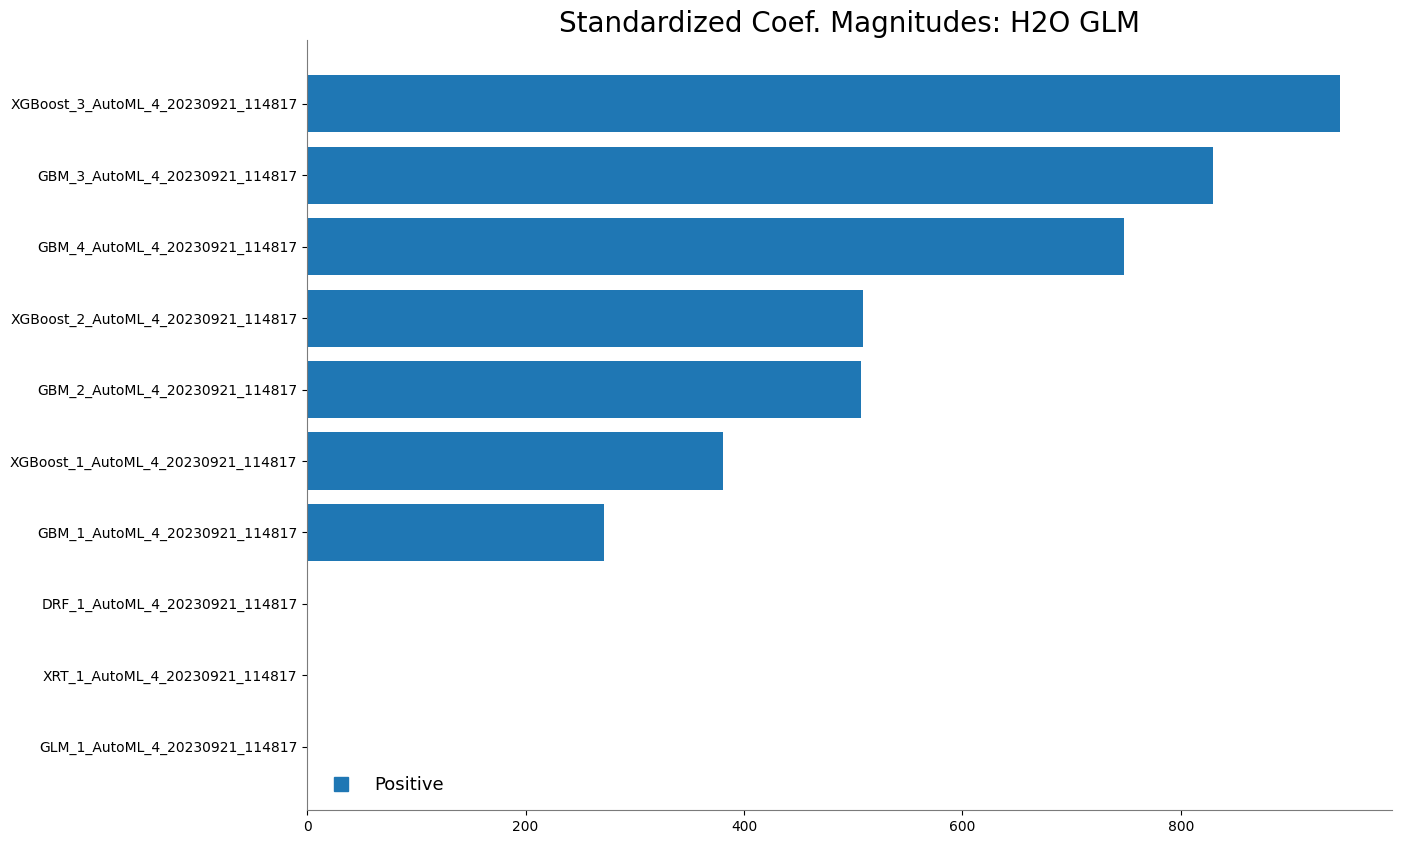

In [14]:
%matplotlib inline
metalearner.std_coef_plot()

# Что с важностью признаков

Model ID: GBM_3_AutoML_4_20230921_114817


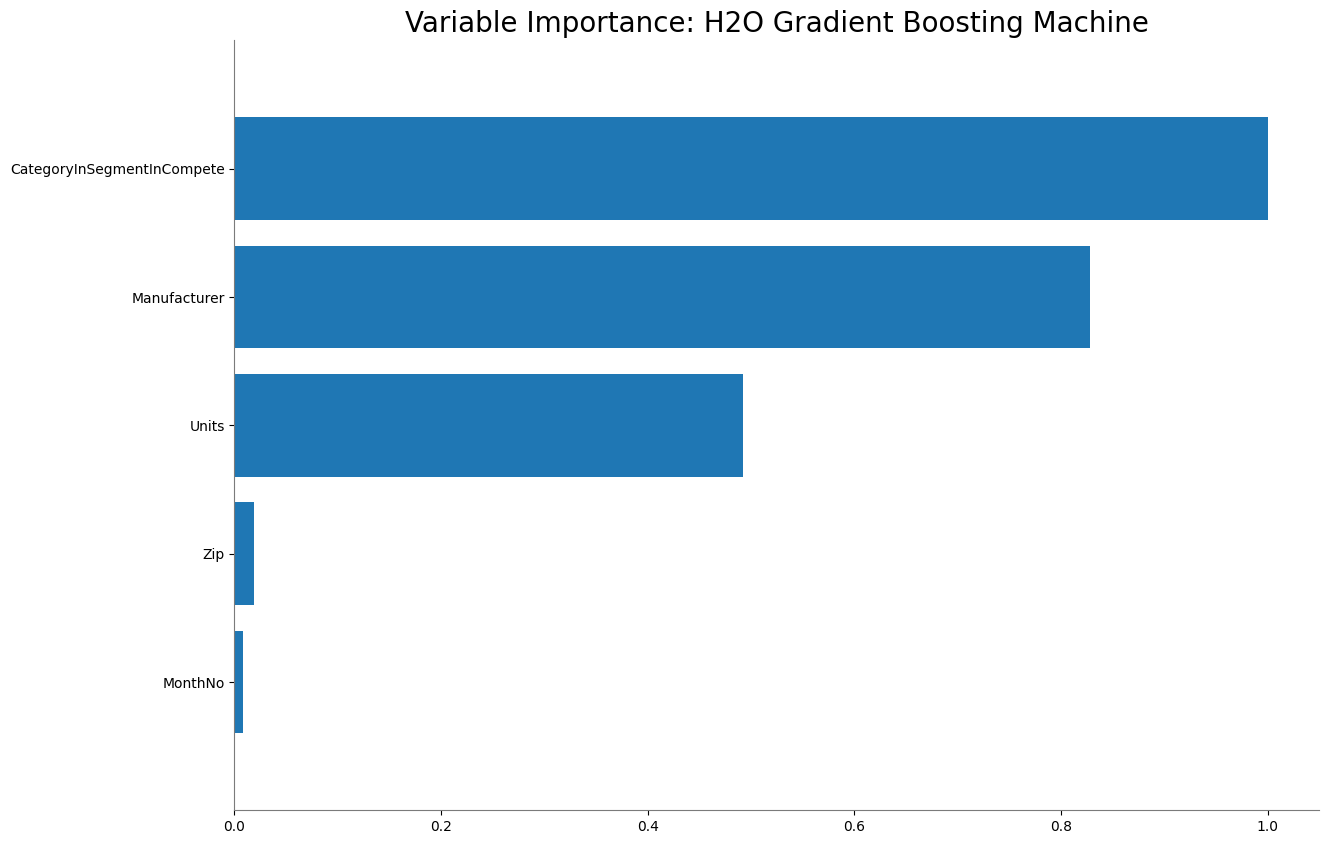

Model ID: StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817
StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817 - ERROR PLOTTING
Model ID: StackedEnsemble_AllModels_1_AutoML_4_20230921_114817
StackedEnsemble_AllModels_1_AutoML_4_20230921_114817 - ERROR PLOTTING
Model ID: GBM_4_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

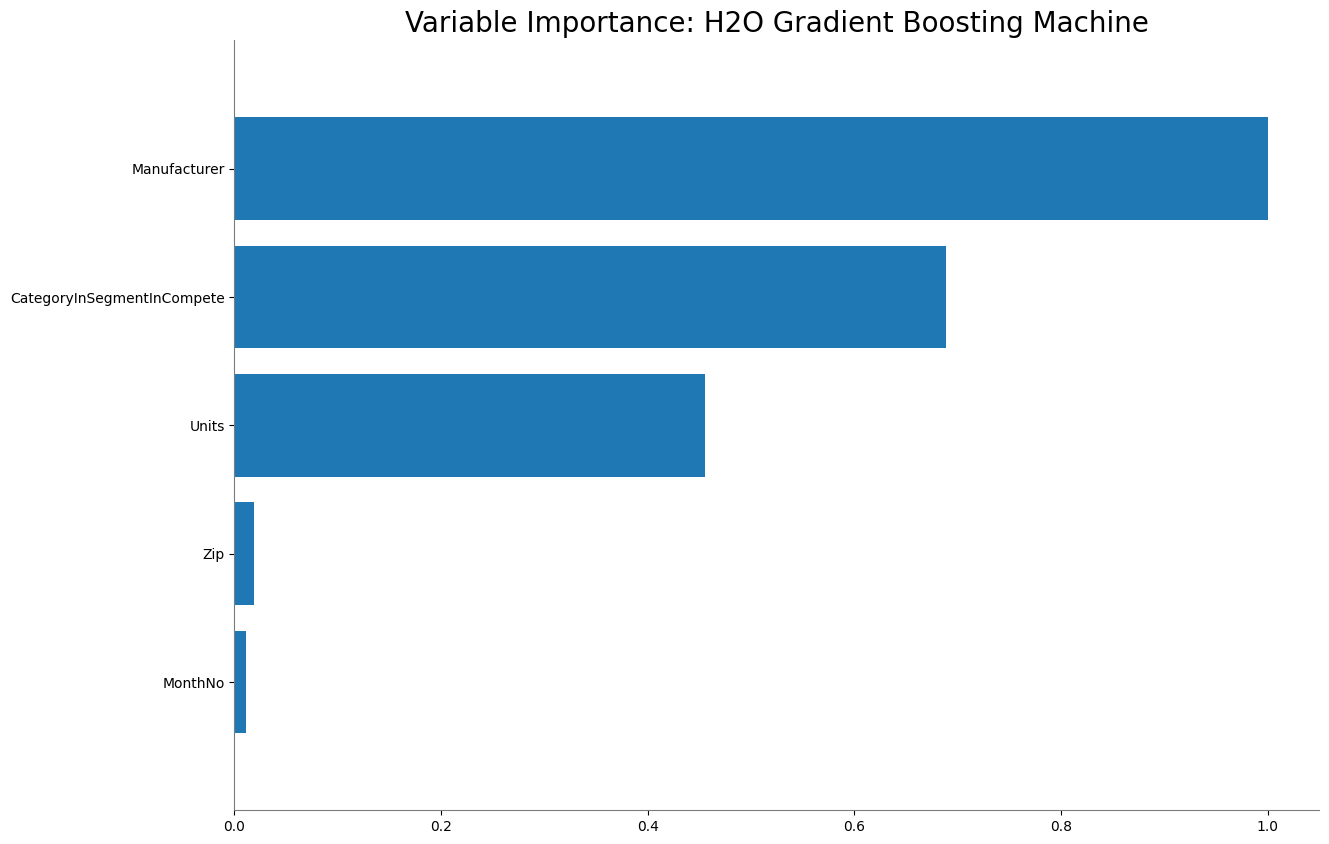

Model ID: GBM_2_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

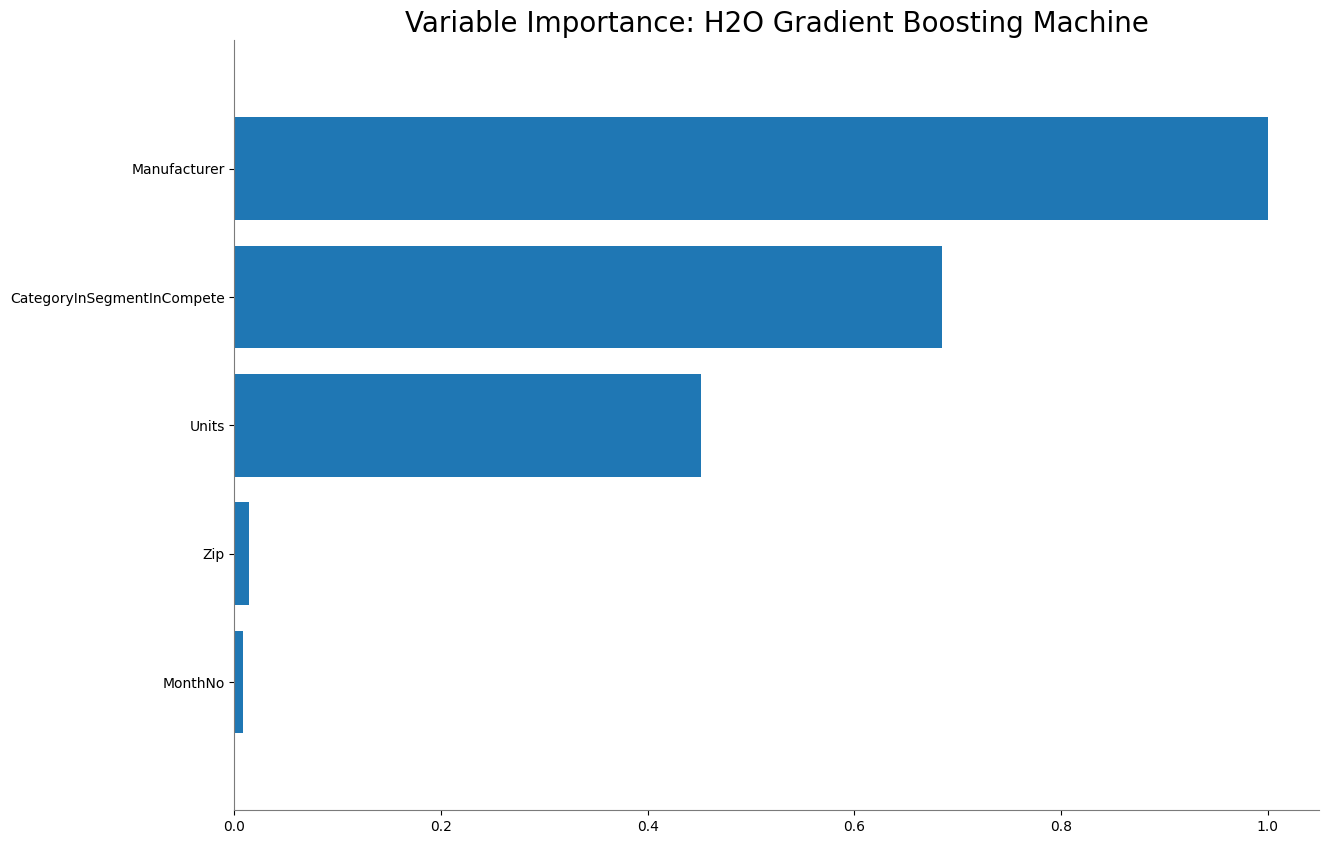

Model ID: XGBoost_3_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

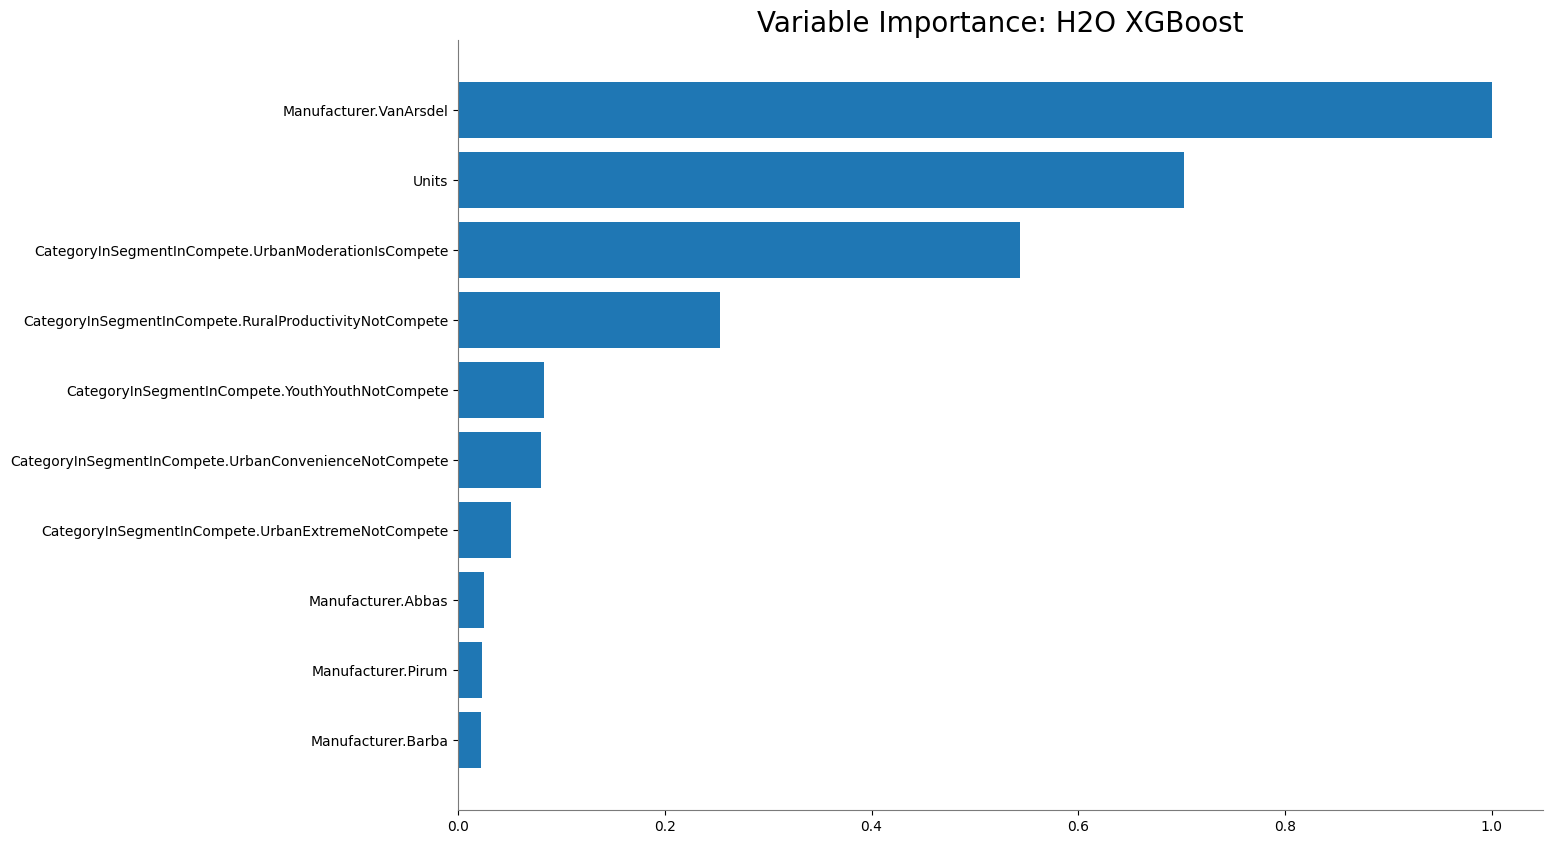

Model ID: XGBoost_2_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

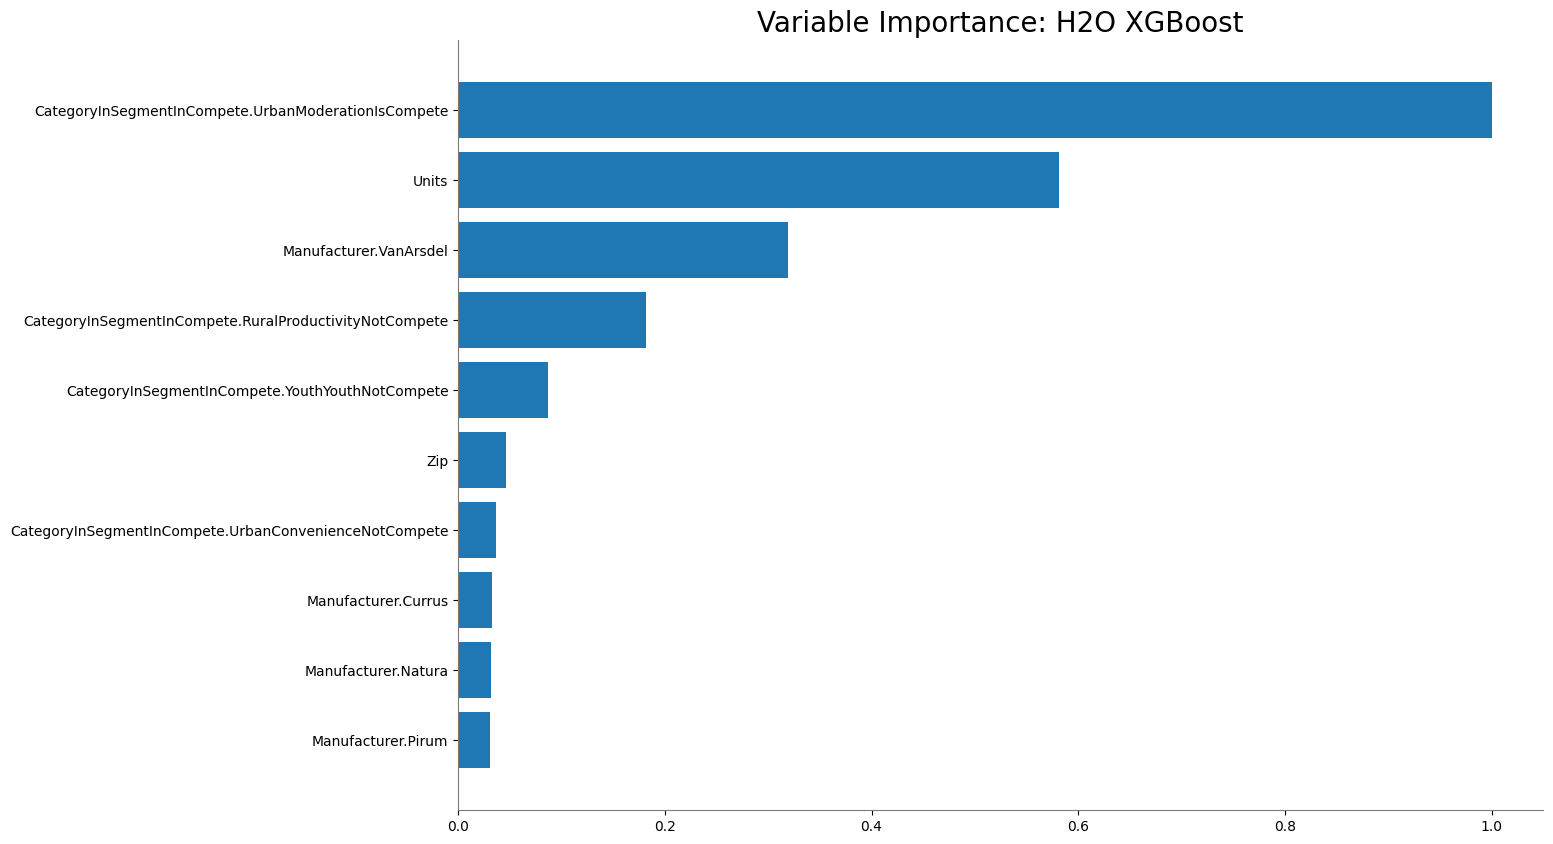

Model ID: XGBoost_1_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

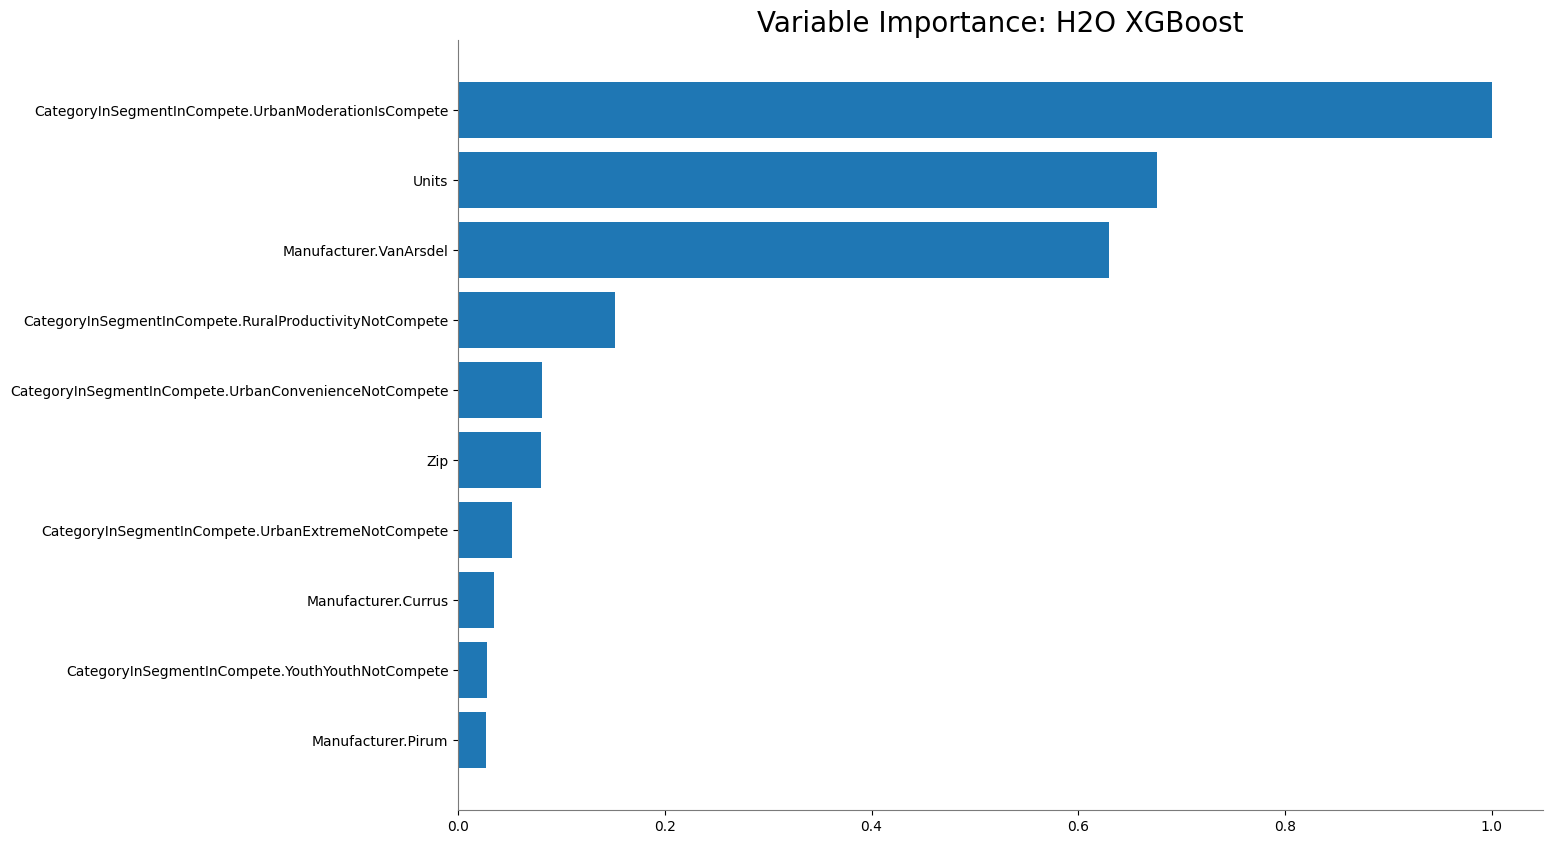

Model ID: GBM_1_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

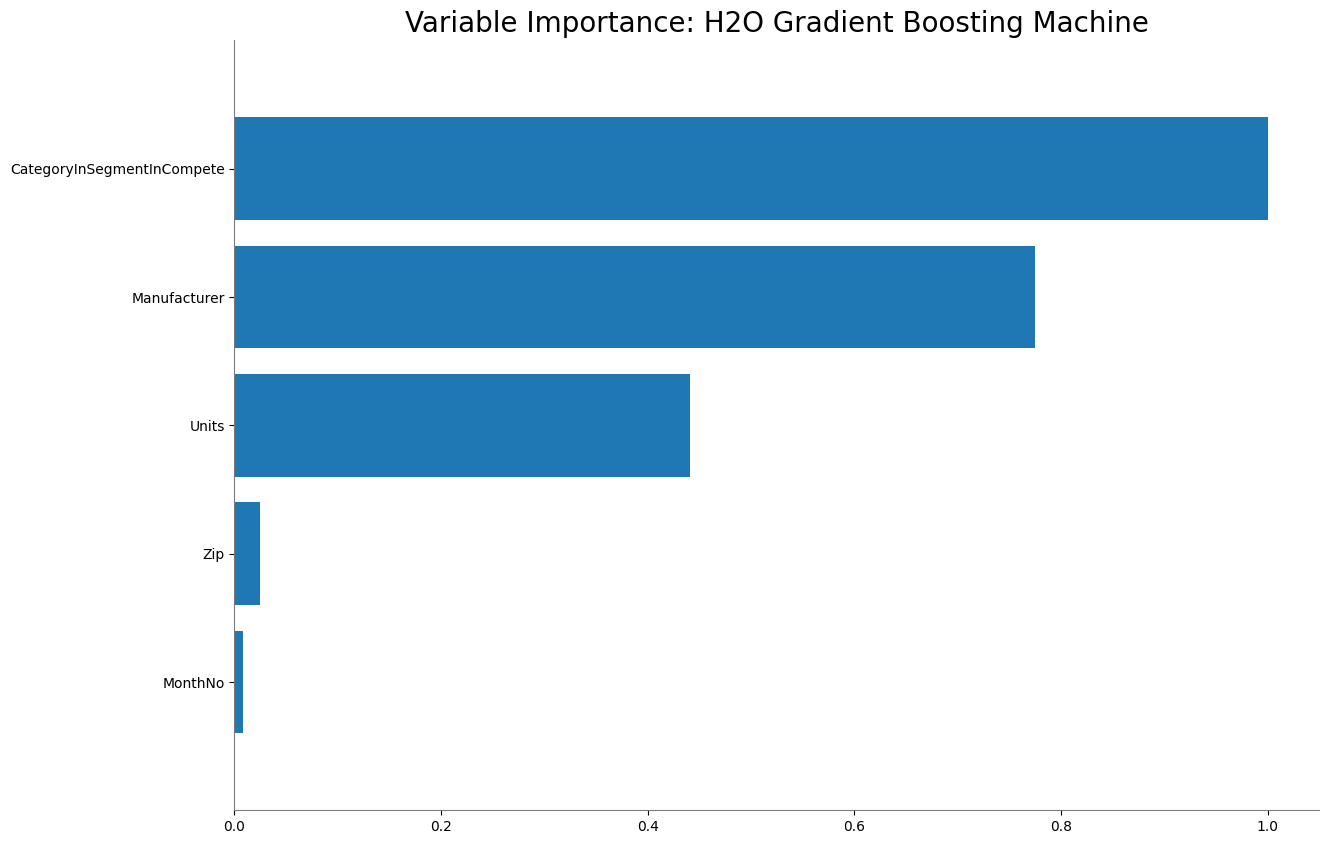

Model ID: DRF_1_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

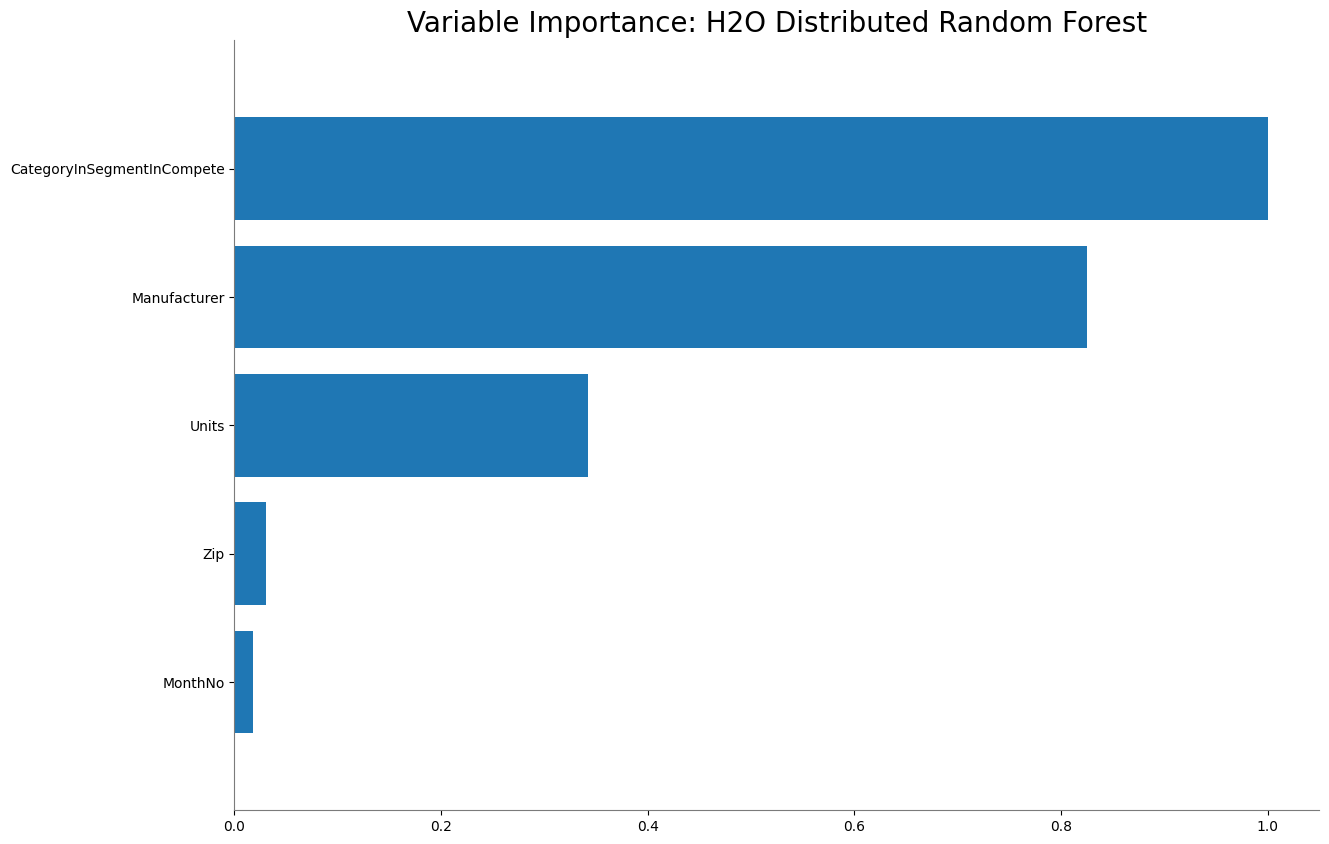

Model ID: XRT_1_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

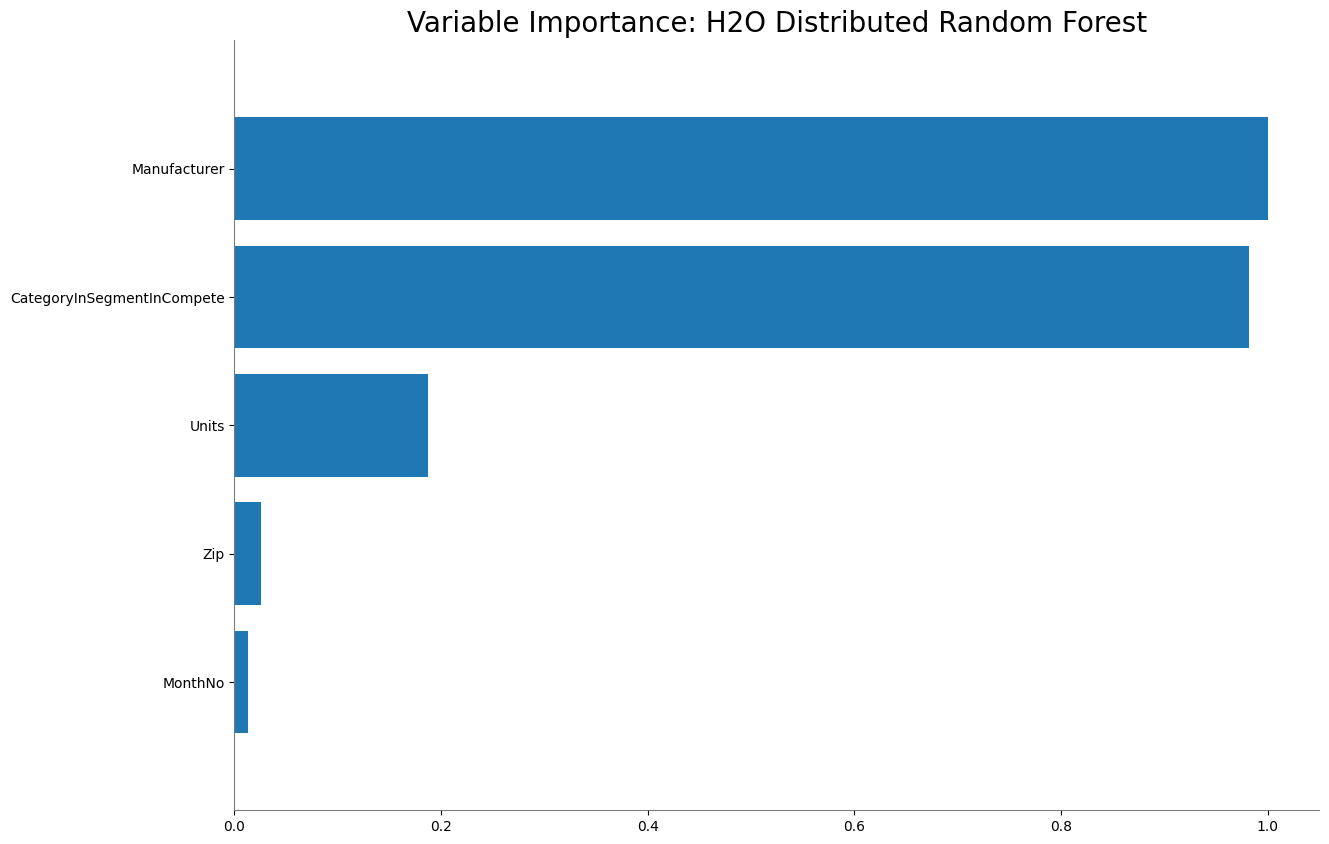

Model ID: GLM_1_AutoML_4_20230921_114817


<Figure size 640x480 with 0 Axes>

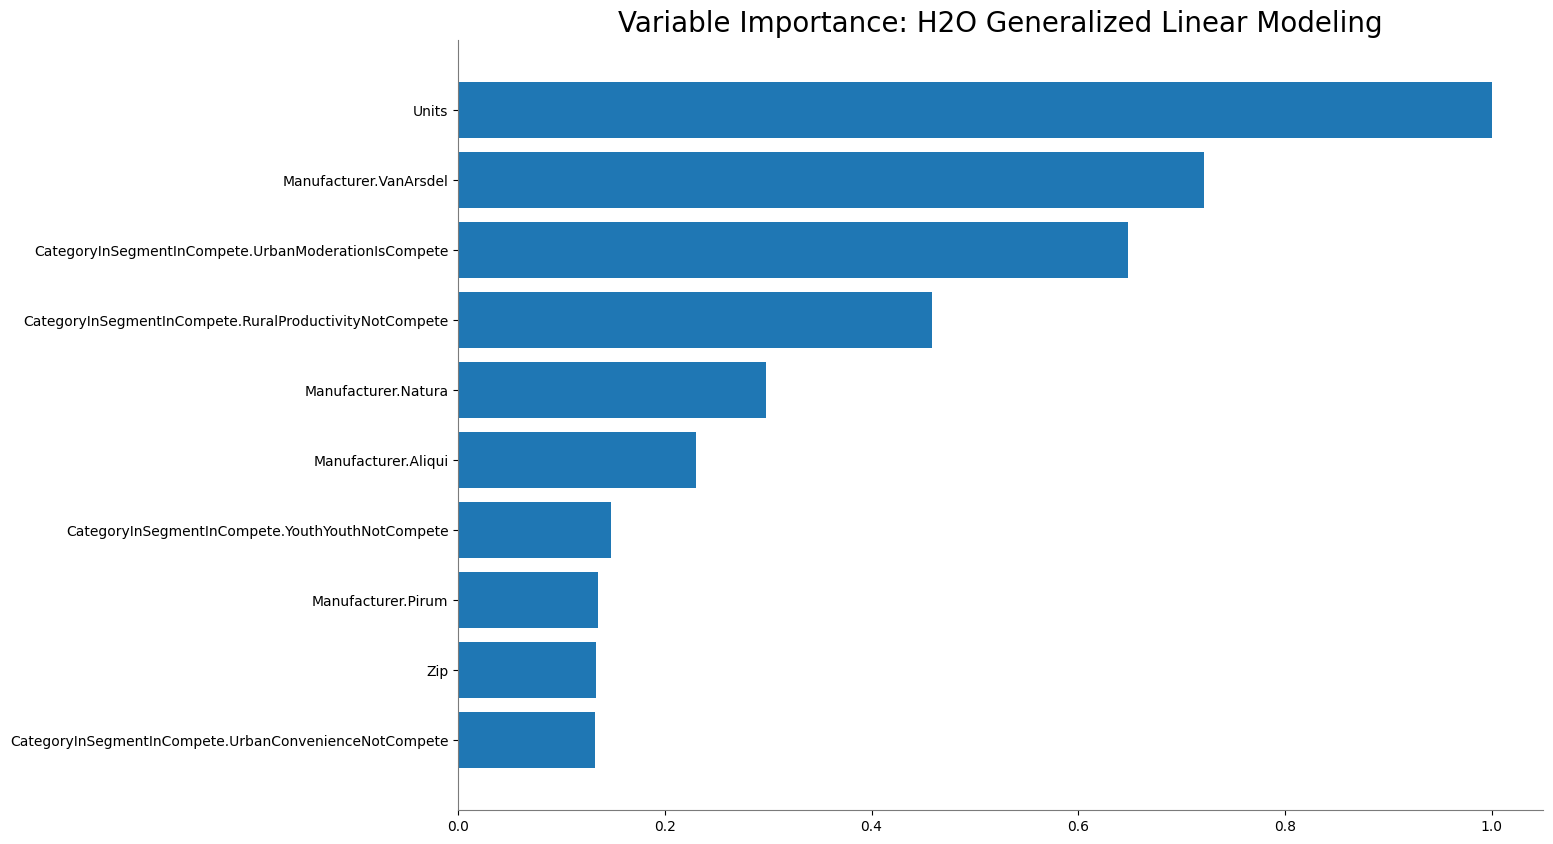

<Figure size 640x480 with 0 Axes>

In [15]:
for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    aml_unit.varimp_plot()
  except:
    print(f"{model_id} - ERROR PLOTTING") 

# Что с переобученносью

In [16]:
import pandas as pd
from sklearn.metrics import r2_score

for model_id in model_ids:
  try:
    print(f"Model ID: {model_id}")
    aml_unit = h2o.get_model(model_id)
    perf = aml_unit.model_performance(valid)
    print(perf)
    print(f"R2 cross validation: {aml_unit.r2()}")
    print(f"R2 test validation: {aml_unit.r2(valid=True)}")
    # прогноз лидирующей моделю на валидационной выборке
    val_pred=aml_unit.predict(unseen).as_data_frame()
    # из валидационного датасеат возбму столбец Stay и сконвертиую его в пандас датафрейм
    val_test = unseen['Revenue_T'].as_data_frame()
    r2_unseen = r2_score(val_test, val_pred)
    print(f"R2 unseen dataset validation: {r2_unseen}")
    print("-------------------\n-------------------")
  except:
    print(f"{model_id} - ERROR CALCULATE PERFOMANCE")

Model ID: GBM_3_AutoML_4_20230921_114817
ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 4521139.0910295565
RMSE: 2126.297037346748
MAE: 1432.1181397765451
RMSLE: 0.3813741476125113
Mean Residual Deviance: 4521139.0910295565
R2 cross validation: 0.8169730598943301
R2 test validation: 0.807662878227669
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
R2 unseen dataset validation: 0.7958703413558914
-------------------
-------------------
Model ID: StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817
ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 4530219.681850794
RMSE: 2128.431272522276
MAE: 1431.9638861219598
RMSLE: 0.38016499302629414
Mean Residual Deviance: 4530219.681850794
R^2: 0.8072765740978063
Null degrees of freedom: 131918
Residual degrees of freedom: 131916
Null deviance: 3100954717976.996
Residual deviance: 597622050210.0748
AIC: 2396205.566798229
R2 cross validation: 0.80604456321

# Графии кривых обучения

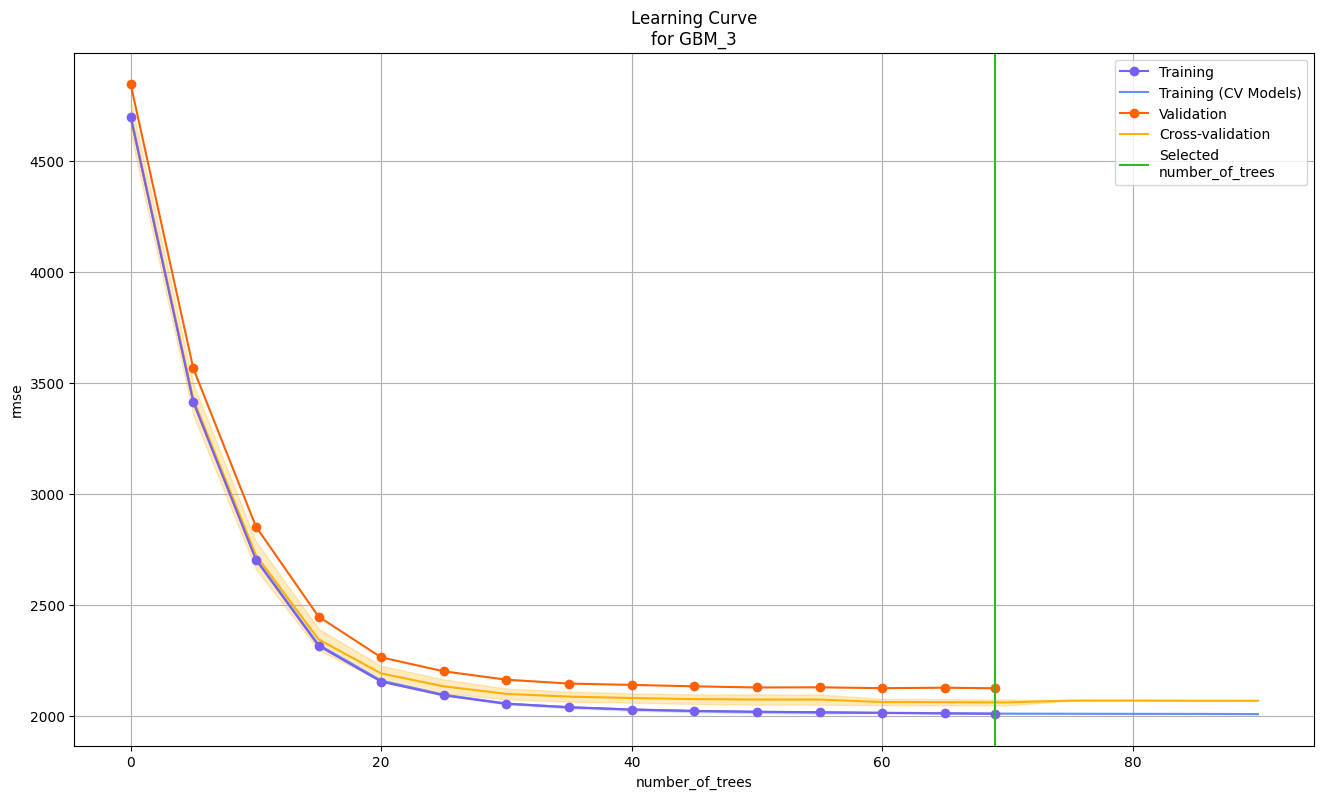

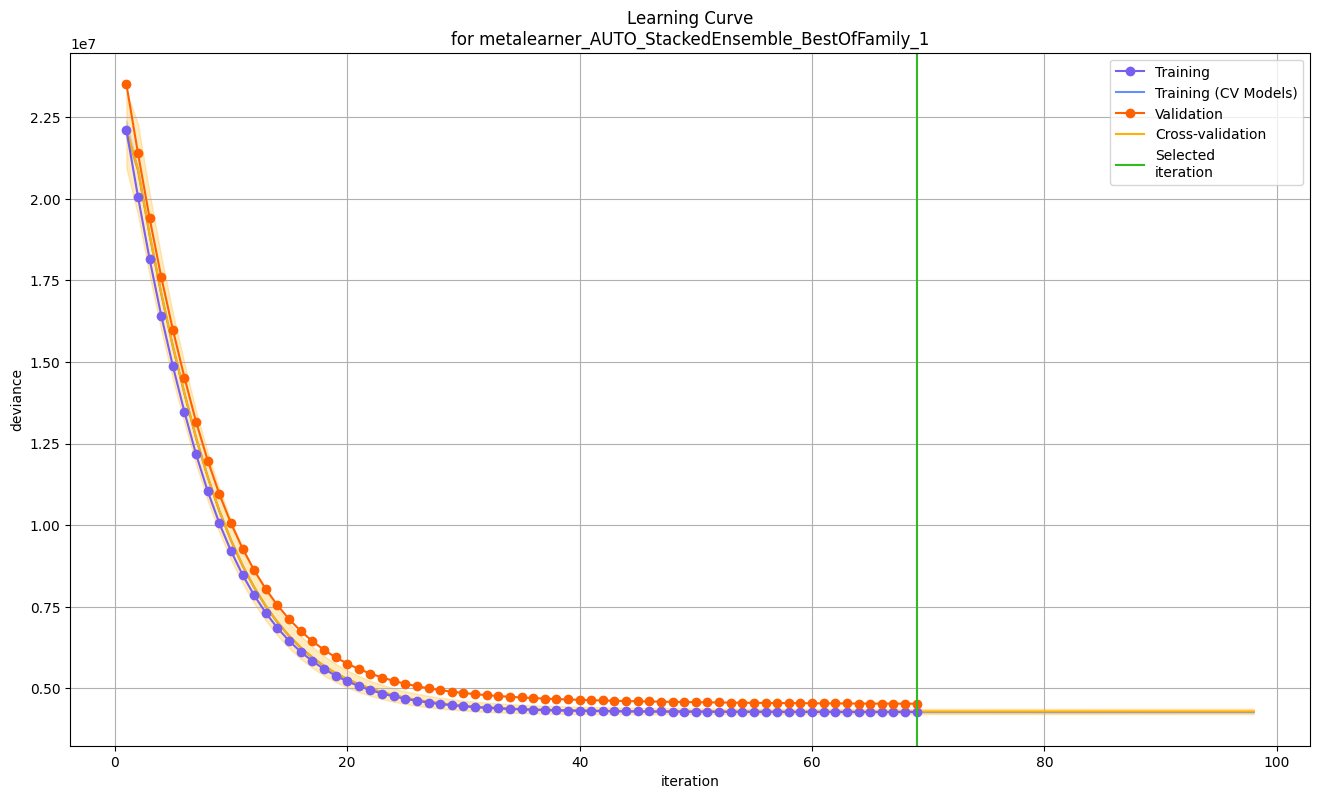

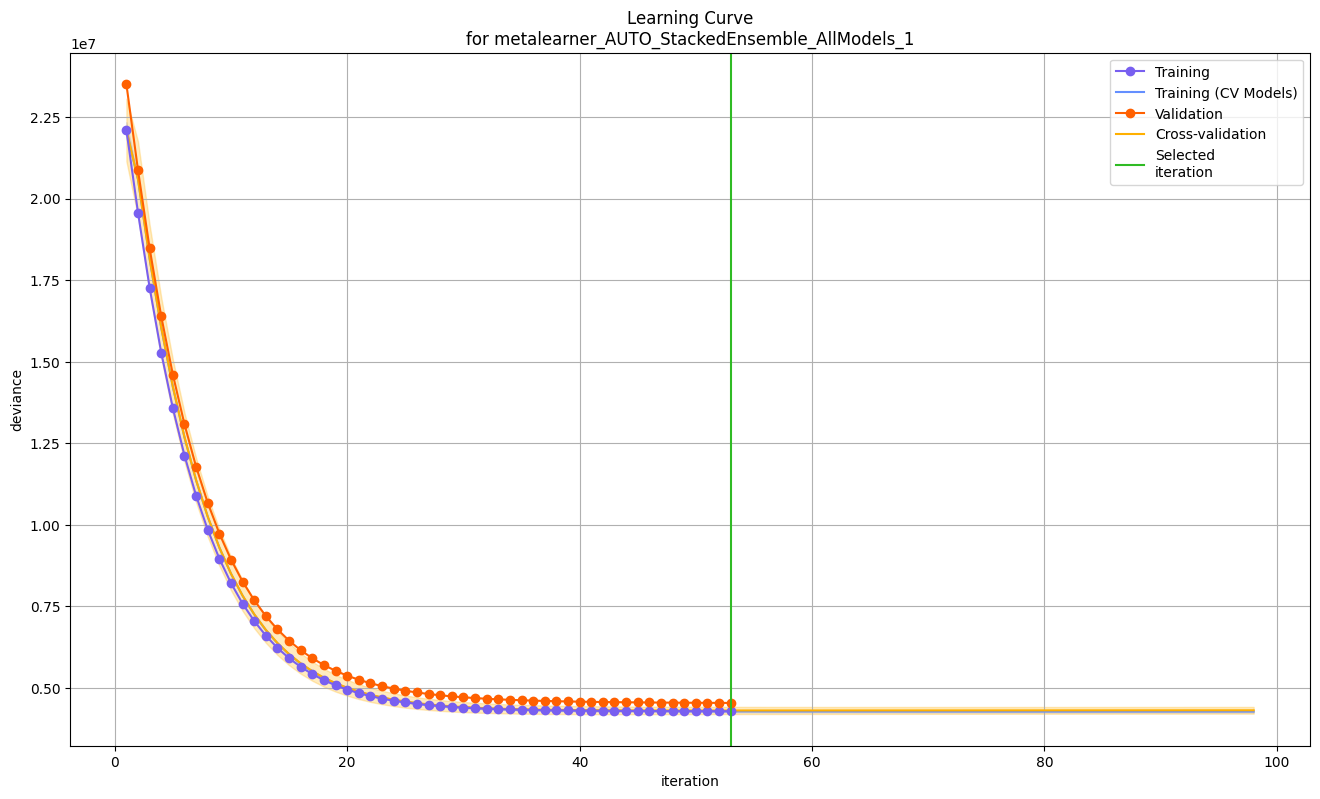

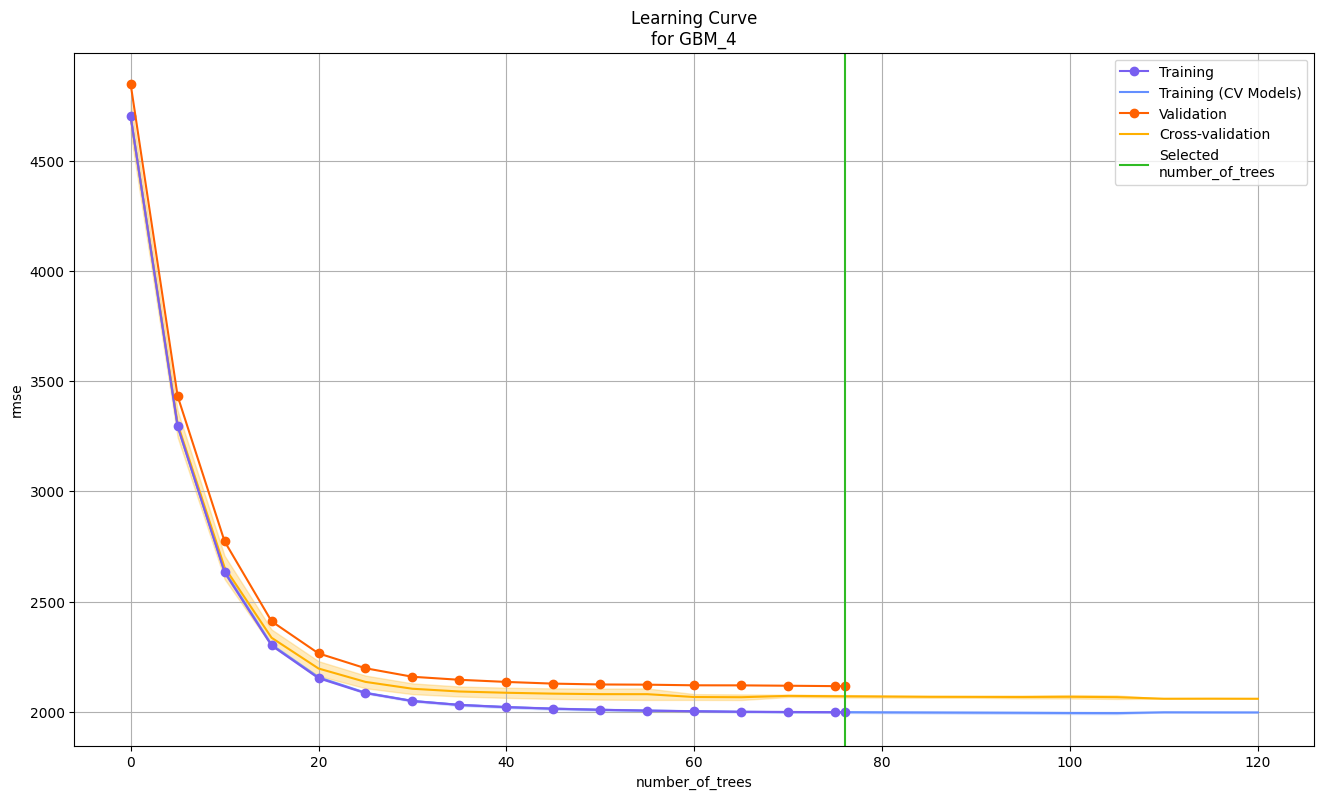

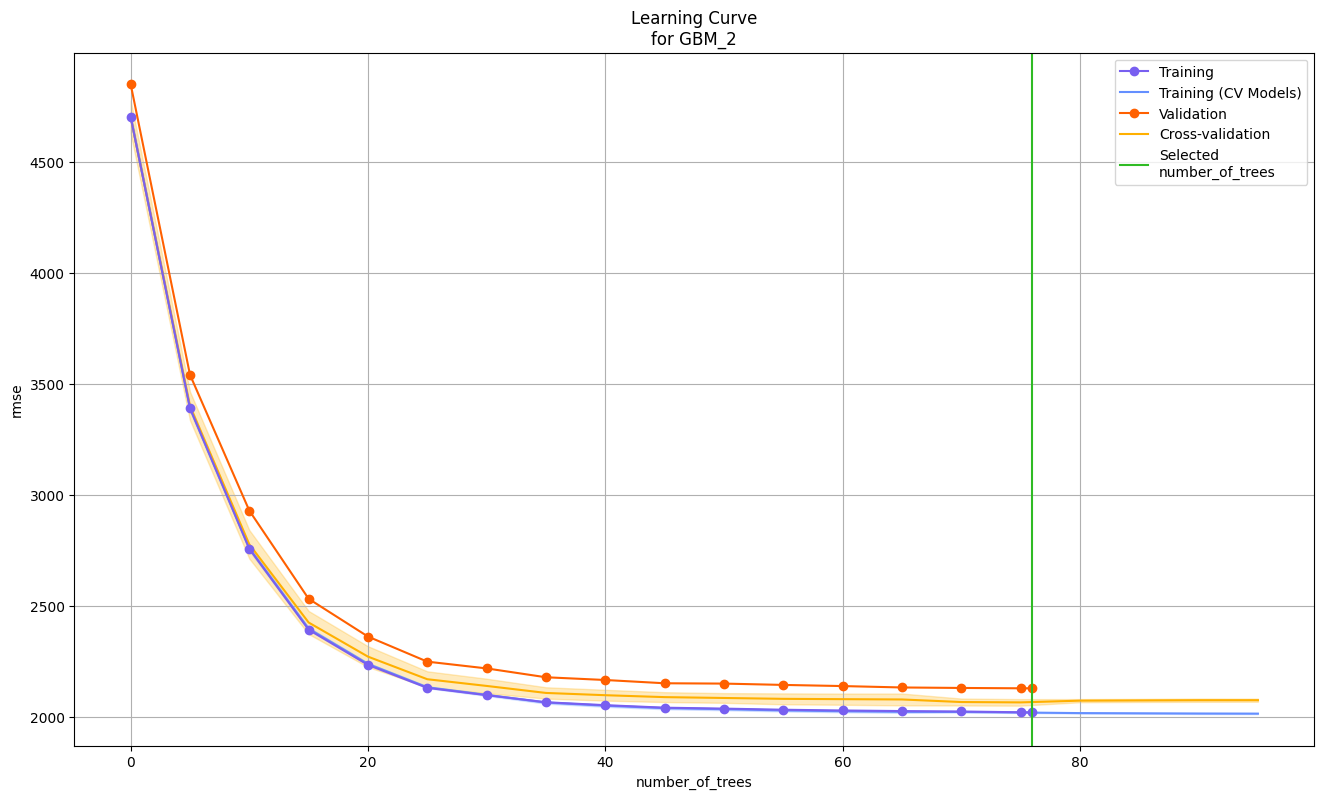

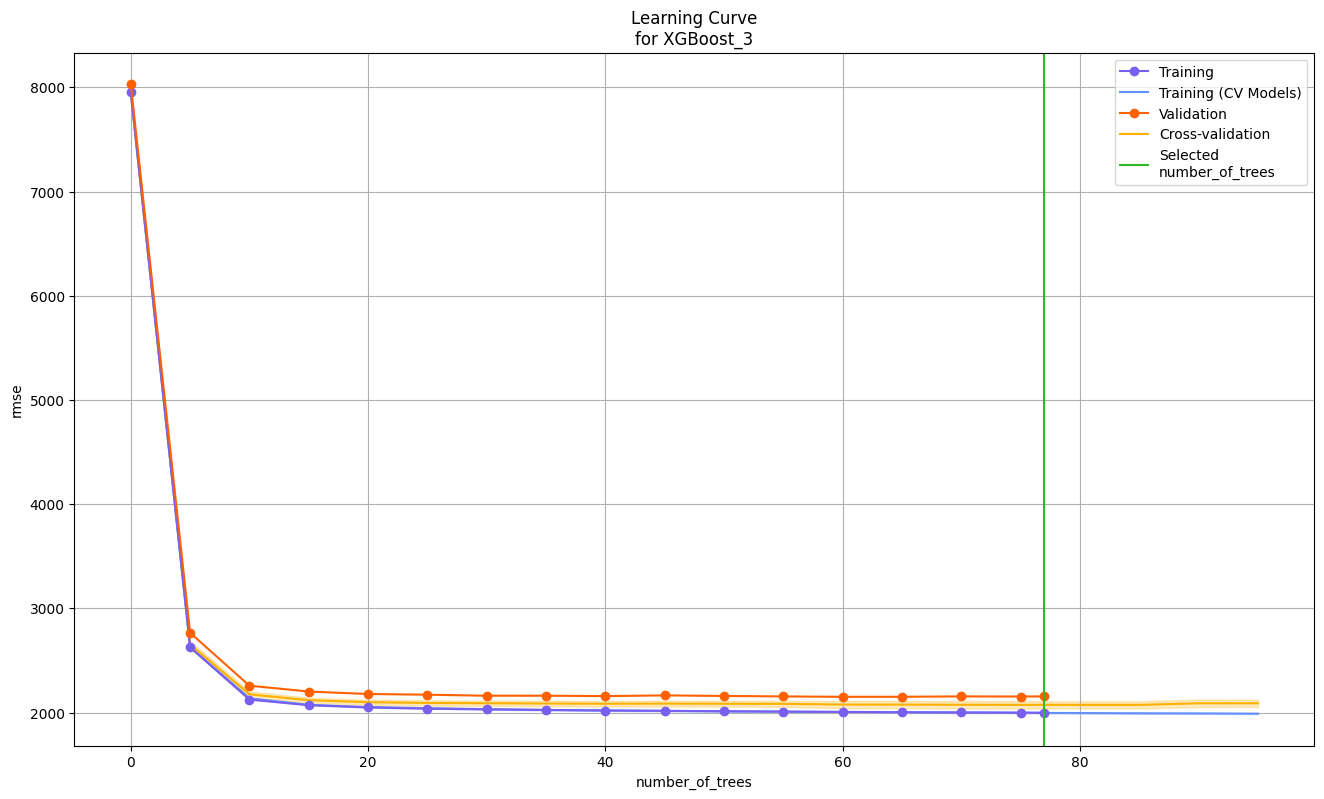

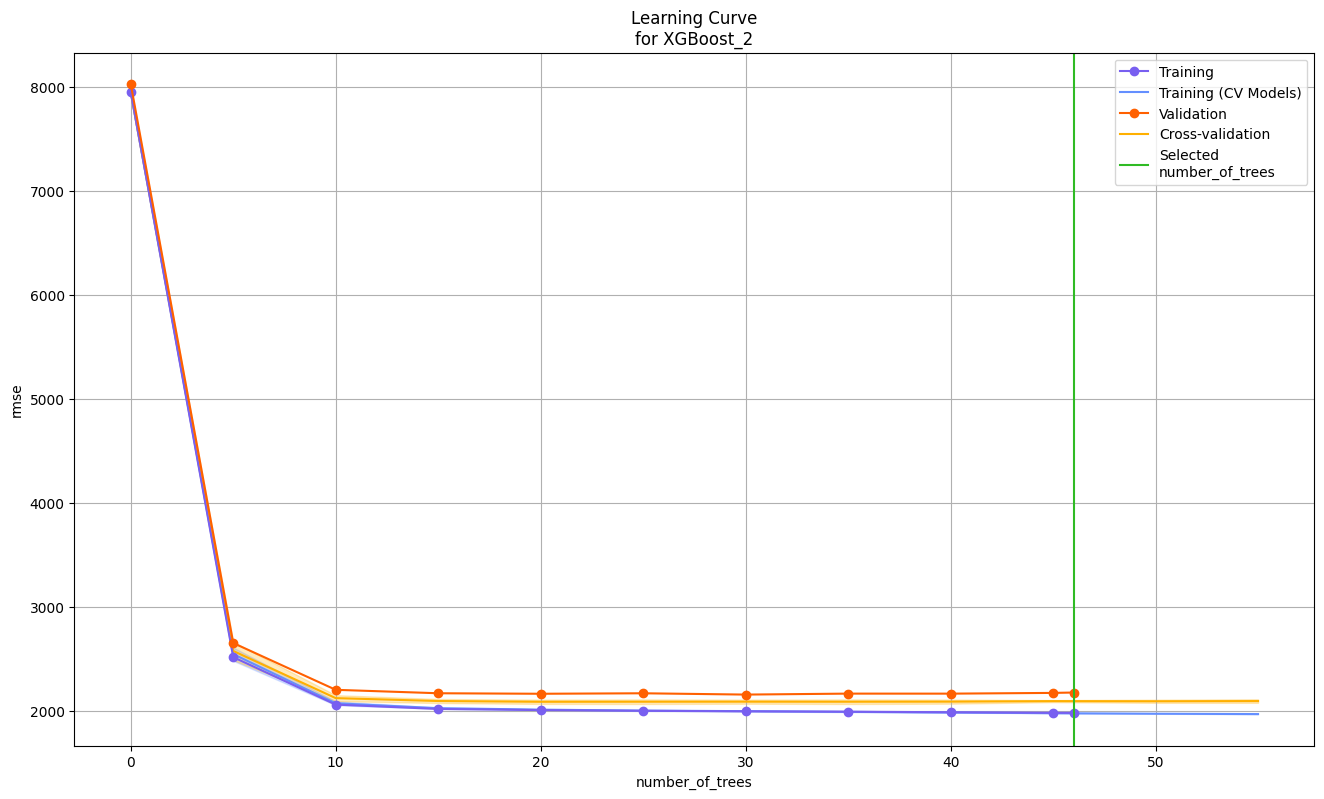

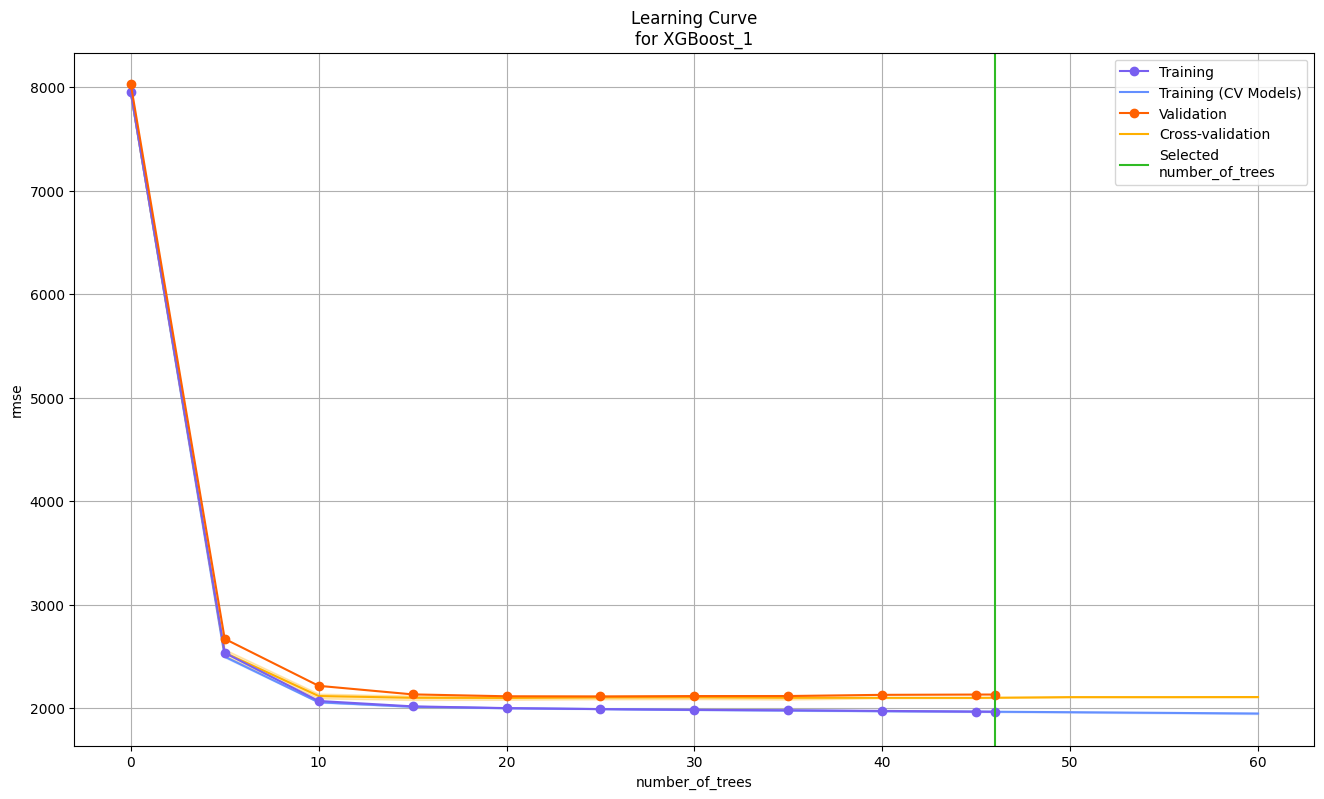

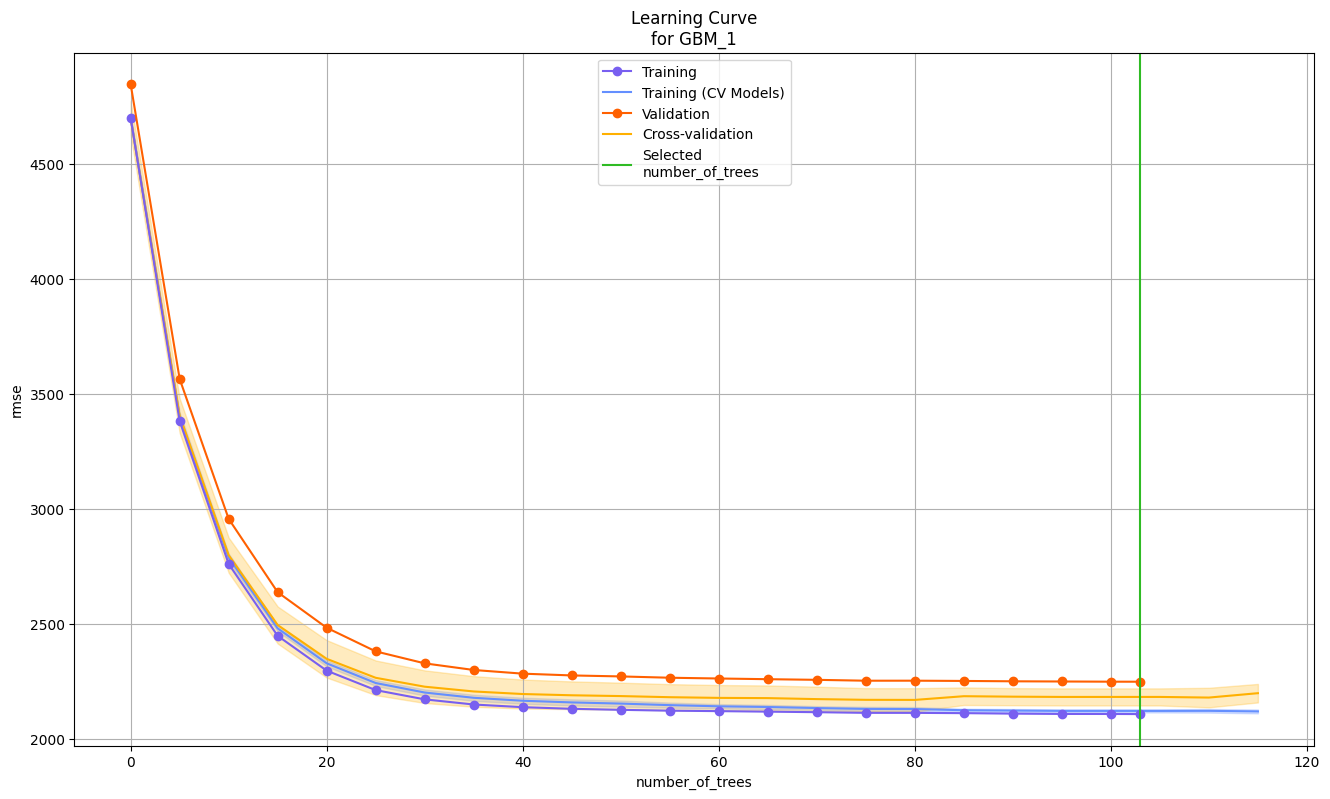

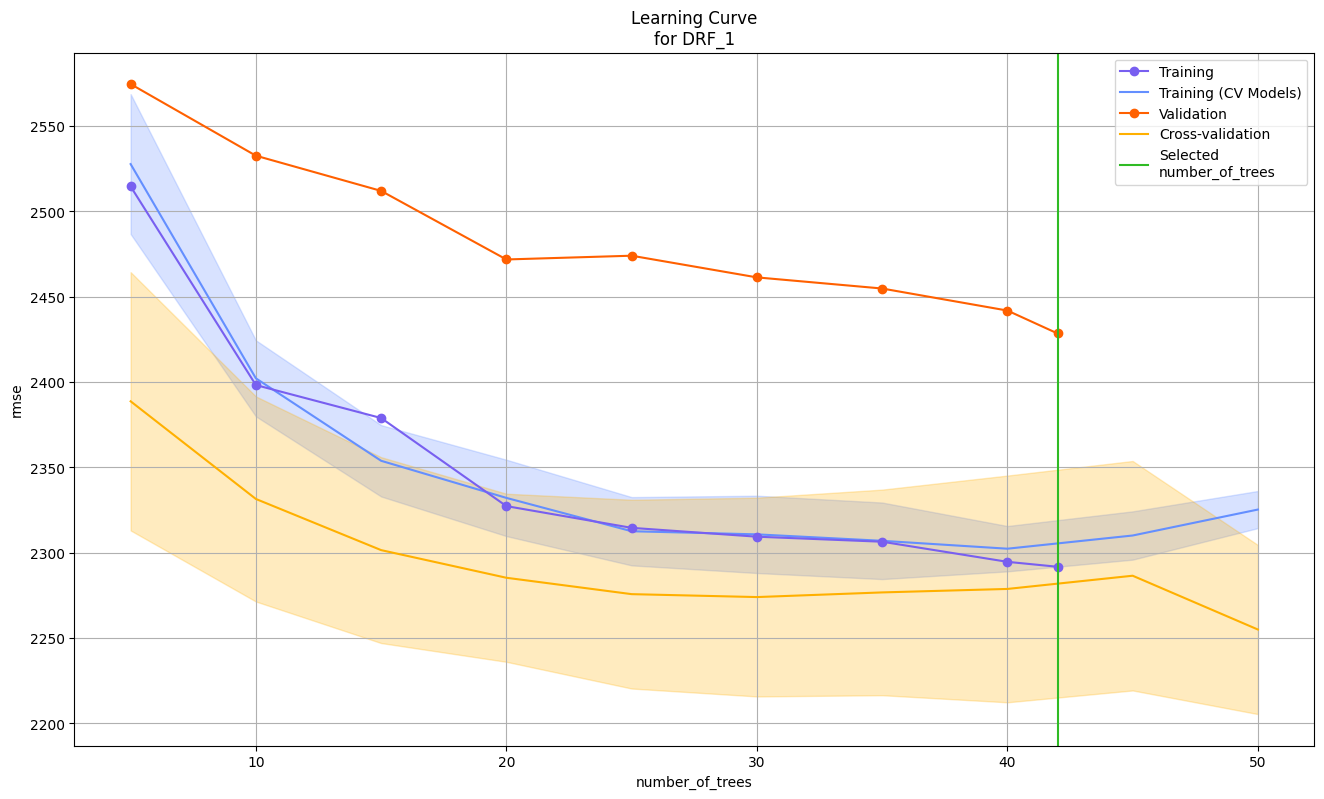

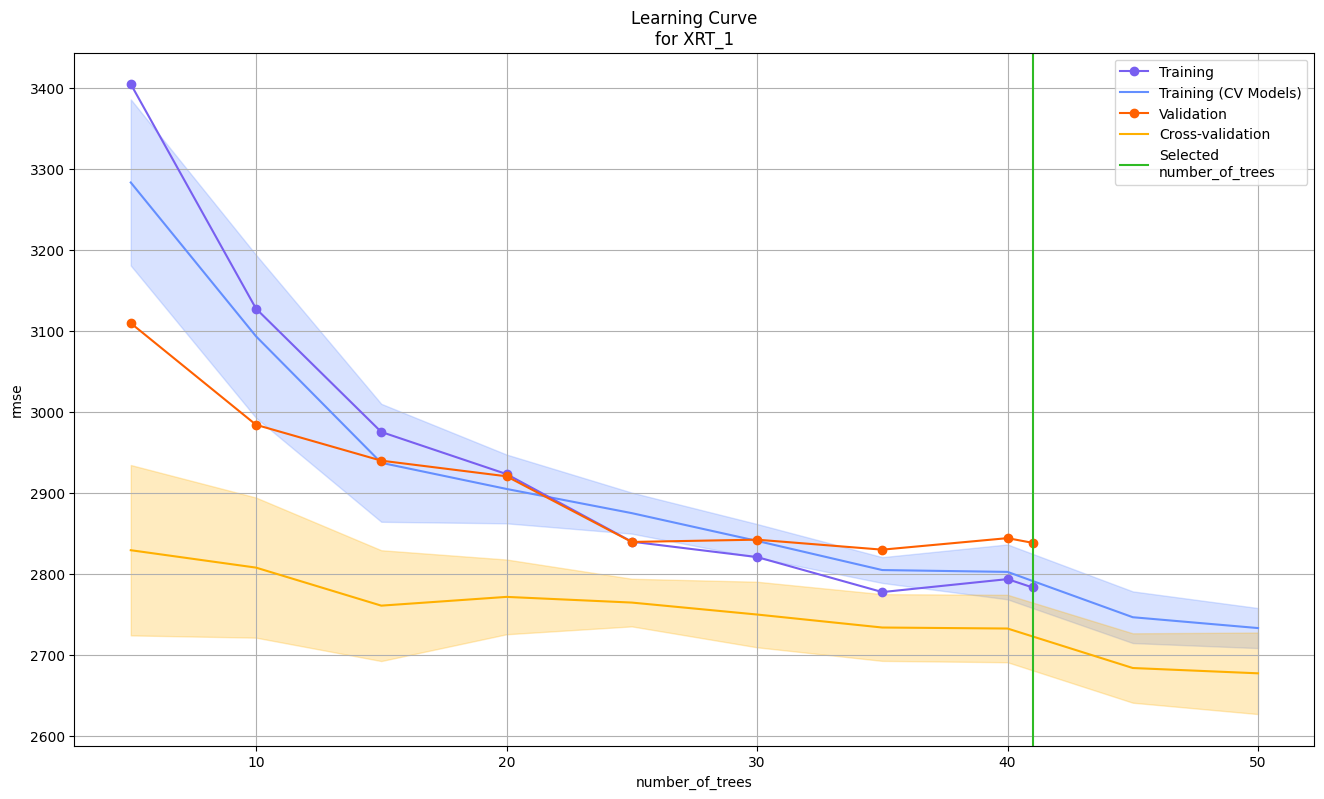

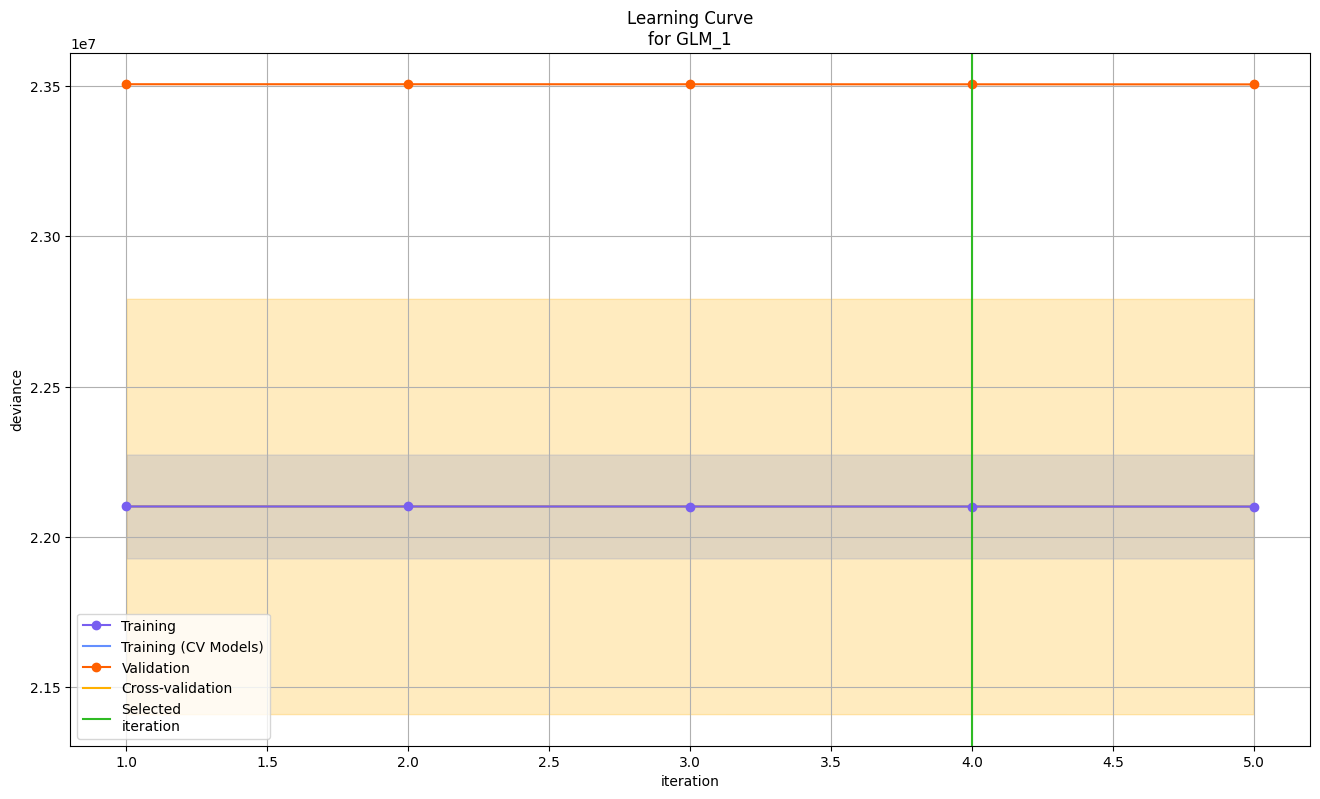

In [17]:
for model_id in model_ids:
  try:
    learning_curve_plot = h2o.get_model(model_id).learning_curve_plot()
  except:
    print(model_id, "- ERROR PLOT")

# Сохранение лучше модели

Довольно стаблильный показатель по Р-квадарт

In [19]:
besy_model_id = 'StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'

In [20]:
# Сохранение лучшей модели
besy_model = h2o.get_model(besy_model_id)
h2o.save_model(besy_model, path = "./models")

'/home/jupyter/Diplom/models/StackedEnsemble_BestOfFamily_1_AutoML_4_20230921_114817'